In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data_path = '/Users/scottblunsden/Programs/FinML/data/raw/'
file_name = 'IVE_dollarValue_resampled_1s'
file_ext = '.parquet'
infp = data_path+file_name+file_ext
df = pd.read_parquet(infp)
print(df.head())
print(df.info(verbose=True))

                     price    bid    ask   size      v        dv
2009-09-28 09:30:00  50.75  50.70  50.79  369.0  369.0  18715.99
2009-09-28 09:31:32  50.75  50.75  50.76  100.0  100.0   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75  100.0  100.0   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76  300.0  300.0  15225.00
2009-09-28 09:31:51  50.75  50.74  50.76  300.0  300.0  15225.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941297 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    941297 non-null float64
bid      941297 non-null float64
ask      941297 non-null float64
size     941297 non-null float64
v        941297 non-null float64
dv       941297 non-null float64
dtypes: float64(6)
memory usage: 50.3 MB
None


In [3]:
import src.features.bars as bar

bars = bar.Bars()

dbars = bars.dollar_bar_df(df, 'dv', 1_000_000).drop_duplicates().dropna()
print(df.head())
print(df.info(verbose=True))

  0%|          | 0/941297 [00:00<?, ?it/s]

 17%|█▋        | 161212/941297 [00:00<00:00, 1612117.69it/s]

 34%|███▍      | 322609/941297 [00:00<00:00, 1612669.94it/s]

 53%|█████▎    | 498762/941297 [00:00<00:00, 1654616.87it/s]

 73%|███████▎  | 682796/941297 [00:00<00:00, 1706270.87it/s]

 93%|█████████▎| 874086/941297 [00:00<00:00, 1763414.77it/s]

100%|██████████| 941297/941297 [00:00<00:00, 1769030.00it/s]

                     price    bid    ask   size      v        dv
2009-09-28 09:30:00  50.75  50.70  50.79  369.0  369.0  18715.99
2009-09-28 09:31:32  50.75  50.75  50.76  100.0  100.0   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75  100.0  100.0   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76  300.0  300.0  15225.00
2009-09-28 09:31:51  50.75  50.74  50.76  300.0  300.0  15225.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941297 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    941297 non-null float64
bid      941297 non-null float64
ask      941297 non-null float64
size     941297 non-null float64
v        941297 non-null float64
dv       941297 non-null float64
dtypes: float64(6)
memory usage: 50.3 MB
None


In [4]:
import src.features.labeller as lab

close = dbars.price.copy()
labeller = lab.Labeller()
dailyVol = labeller.getDailyVol(close).dropna()

print(dailyVol.to_frame().head())


                     dailyVol
2009-09-29 10:40:29  0.000605
2009-09-29 11:18:50  0.002826
2009-09-29 12:02:43  0.003339
2009-09-29 12:53:47  0.002932
2009-09-29 13:59:56  0.002609


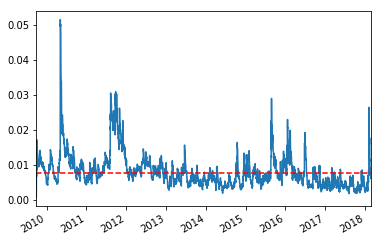

In [5]:
import matplotlib.pyplot as plt

f,ax=plt.subplots()
dailyVol.plot(ax=ax)
ax.axhline(dailyVol.mean(),ls='--',color='r')


In [6]:
tEvents = labeller.getTEvents(close,h=dailyVol.mean())
tEvents

  0%|          | 0/30858 [00:00<?, ?it/s]

  2%|▏         | 549/30858 [00:00<00:05, 5483.76it/s]

  4%|▍         | 1175/30858 [00:00<00:05, 5695.62it/s]

  6%|▌         | 1856/30858 [00:00<00:04, 5989.19it/s]

  8%|▊         | 2593/30858 [00:00<00:04, 6344.37it/s]

 11%|█         | 3363/30858 [00:00<00:04, 6697.29it/s]

 13%|█▎        | 4121/30858 [00:00<00:03, 6939.01it/s]

 16%|█▌        | 4857/30858 [00:00<00:03, 7059.07it/s]

 18%|█▊        | 5636/30858 [00:00<00:03, 7260.78it/s]

 21%|██        | 6419/30858 [00:00<00:03, 7420.62it/s]

 23%|██▎       | 7202/30858 [00:01<00:03, 7536.65it/s]

 26%|██▌       | 7976/30858 [00:01<00:03, 7594.18it/s]

 28%|██▊       | 8734/30858 [00:01<00:02, 7589.79it/s]

 31%|███       | 9488/30858 [00:01<00:02, 7445.81it/s]

 33%|███▎      | 10251/30858 [00:01<00:02, 7500.06it/s]

 36%|███▌      | 11036/30858 [00:01<00:02, 7600.15it/s]

 38%|███▊      | 11822/30858 [00:01<00:02, 7674.76it/s]

 41%|████      | 12589/30858 [00:01<00:02, 7672.45it/s]

 43%|████▎     | 13377/30858 [00:01<00:02, 7733.45it/s]

 46%|████▌     | 14168/30858 [00:01<00:02, 7780.18it/s]

 48%|████▊     | 14946/30858 [00:02<00:02, 7767.91it/s]

 51%|█████     | 15737/30858 [00:02<00:01, 7808.22it/s]

 54%|█████▎    | 16527/30858 [00:02<00:01, 7835.02it/s]

 56%|█████▌    | 17311/30858 [00:02<00:01, 7835.64it/s]

 59%|█████▊    | 18095/30858 [00:02<00:01, 7801.32it/s]

 61%|██████    | 18876/30858 [00:02<00:01, 7803.31it/s]

 64%|██████▍   | 19676/30858 [00:02<00:01, 7859.58it/s]

 66%|██████▋   | 20463/30858 [00:02<00:01, 7851.79it/s]

 69%|██████▉   | 21249/30858 [00:02<00:01, 7841.20it/s]

 71%|███████▏  | 22034/30858 [00:02<00:01, 7774.90it/s]

 74%|███████▍  | 22816/30858 [00:03<00:01, 7786.28it/s]

 77%|███████▋  | 23611/30858 [00:03<00:00, 7834.01it/s]

 79%|███████▉  | 24397/30858 [00:03<00:00, 7839.23it/s]

 82%|████████▏ | 25182/30858 [00:03<00:00, 7783.27it/s]

 84%|████████▍ | 25961/30858 [00:03<00:00, 7762.90it/s]

 87%|████████▋ | 26738/30858 [00:03<00:00, 7763.03it/s]

 89%|████████▉ | 27515/30858 [00:03<00:00, 7736.89it/s]

 92%|█████████▏| 28294/30858 [00:03<00:00, 7752.65it/s]

 94%|█████████▍| 29073/30858 [00:03<00:00, 7761.61it/s]

 97%|█████████▋| 29850/30858 [00:03<00:00, 7755.67it/s]

 99%|█████████▉| 30645/30858 [00:04<00:00, 7812.11it/s]

100%|██████████| 30858/30858 [00:04<00:00, 7626.42it/s]

DatetimeIndex(['2009-09-29 09:33:01', '2009-09-30 09:45:21',
               '2009-09-30 13:31:12', '2009-10-01 09:43:58',
               '2009-10-01 11:12:07', '2009-10-02 09:44:14',
               '2009-10-02 10:35:05', '2009-10-05 09:51:42',
               '2009-10-05 14:55:48', '2009-10-06 09:29:52',
               ...
               '2018-02-16 14:23:51', '2018-02-20 09:30:00',
               '2018-02-20 15:21:07', '2018-02-21 14:04:12',
               '2018-02-21 15:12:30', '2018-02-22 12:18:21',
               '2018-02-22 14:56:14', '2018-02-23 11:37:32',
               '2018-02-23 15:58:39', '2018-02-26 13:06:34'],
              dtype='datetime64[ns]', length=2278, freq=None)

In [7]:
t1 = labeller.addVerticalBarrier(tEvents, close, numDays=1)
t1.head()

2009-09-29 09:33:01   2009-09-30 09:45:21
2009-09-30 09:45:21   2009-10-01 10:00:48
2009-09-30 13:31:12   2009-10-01 13:33:25
2009-10-01 09:43:58   2009-10-02 09:44:14
2009-10-01 11:12:07   2009-10-02 11:50:21
dtype: datetime64[ns]

In [8]:
# create target series
ptsl = [1,1]
target=dailyVol
# select minRet
minRet = 0.01

from multiprocessing import cpu_count

# Run in single-threaded mode on Windows
import platform
if platform.system() == "Windows":
    cpus = 1
else:
    cpus = cpu_count() - 1
    
events = labeller.getEvents(close,tEvents,ptsl,target,minRet,cpus,t1=t1)

2019-03-17 11:41:51.861682 100.0% applyPtSlOnT1 done after 0.02 minutes. Remaining 0.0 minutes.


In [9]:
labels = labeller.getBins(events, close)
print(labels.head())
print(labels.info(verbose=True))
print(labels.bin.value_counts())

                          ret  bin
2009-10-05 14:55:48  0.015732  1.0
2009-10-06 09:29:52  0.000982  1.0
2009-10-06 11:32:02 -0.006544 -1.0
2009-10-06 14:07:37  0.002648  1.0
2009-10-08 09:29:51 -0.003092 -1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 2009-10-05 14:55:48 to 2018-02-15 14:05:41
Data columns (total 2 columns):
ret    929 non-null float64
bin    929 non-null float64
dtypes: float64(2)
memory usage: 61.8 KB
None
 1.0    523
-1.0    406
Name: bin, dtype: int64


In [10]:
clean_labels = labeller.dropLabels(labels)
print(clean_labels.head())
print(clean_labels.info(verbose=True))
print(clean_labels.bin.value_counts())

                          ret  bin
2009-10-05 14:55:48  0.015732  1.0
2009-10-06 09:29:52  0.000982  1.0
2009-10-06 11:32:02 -0.006544 -1.0
2009-10-06 14:07:37  0.002648  1.0
2009-10-08 09:29:51 -0.003092 -1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 2009-10-05 14:55:48 to 2018-02-15 14:05:41
Data columns (total 2 columns):
ret    929 non-null float64
bin    929 non-null float64
dtypes: float64(2)
memory usage: 61.8 KB
None
 1.0    523
-1.0    406
Name: bin, dtype: int64
